<a href="https://colab.research.google.com/github/NAizdabezt/sgu_data_analysit/blob/main/da06_diabetes_TuNhatAnh_3122410012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pima Indians Diabetes Dataset

##I. GIỚI THIỆU DỮ LIỆU

Trong thời đại dữ liệu lớn (Big Data), các mô hình học máy (Machine Learning) ngày càng được ứng dụng rộng rãi trong y học.  
Một trong những ứng dụng tiêu biểu là **dự đoán khả năng mắc bệnh** dựa trên các chỉ số sức khỏe.  

Bài toán “**Diabetes Classification**” sử dụng bộ dữ liệu Pima Indians Diabetes Dataset,  
mục tiêu là **phân loại bệnh nhân** thành hai nhóm:
- **1** → Có nguy cơ mắc bệnh tiểu đường.  
- **0** → Không mắc bệnh.  

Tập dữ liệu gồm 8 chỉ số y tế: Glucose, BloodPressure, SkinThickness, Insulin, BMI, Age, v.v.  
Từ các chỉ số này, mô hình học máy sẽ “học” cách phân biệt bệnh nhân khỏe mạnh và bệnh nhân mắc bệnh.


###Ý nghĩa các cột:

| Tên cột                    | Giải thích                                  |
| -------------------------- | ------------------------------------------- |
| `Pregnancies`              | Số lần mang thai                            |
| `Glucose`                  | Nồng độ đường huyết (mg/dL)                 |
| `BloodPressure`            | Huyết áp (mmHg)                             |
| `SkinThickness`            | Độ dày nếp da (mm)                          |
| `Insulin`                  | Mức insulin trong máu                       |
| `BMI`                      | Chỉ số khối cơ thể (Body Mass Index)        |
| `DiabetesPedigreeFunction` | Chỉ số di truyền nguy cơ tiểu đường         |
| `Age`                      | Tuổi bệnh nhân                              |
| `Outcome`                  | Nhãn phân loại: 1 = Mắc bệnh, 0 = Không mắc |


##II. CODE KHỞI TẠO DỮ LIỆU

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Tải dataset từ sklearn
from sklearn.datasets import load_diabetes

# ⚠️ Dataset trong sklearn là dạng hồi quy, nên ta dùng bản phân loại phổ biến hơn:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
diabetes = pd.read_csv(url)

print("✅ Dữ liệu đã tải thành công!")
print("Kích thước dữ liệu:", diabetes.shape)
diabetes.head()

✅ Dữ liệu đã tải thành công!
Kích thước dữ liệu: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##III. KHÁM PHÁ DỮ LIỆU & NHẬN XÉT

###Biểu đồ số lượng giá trị 0 trong từng cột

/tmp/ipython-input-1410935026.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zero_counts.index, y=zero_counts.values, palette="viridis")


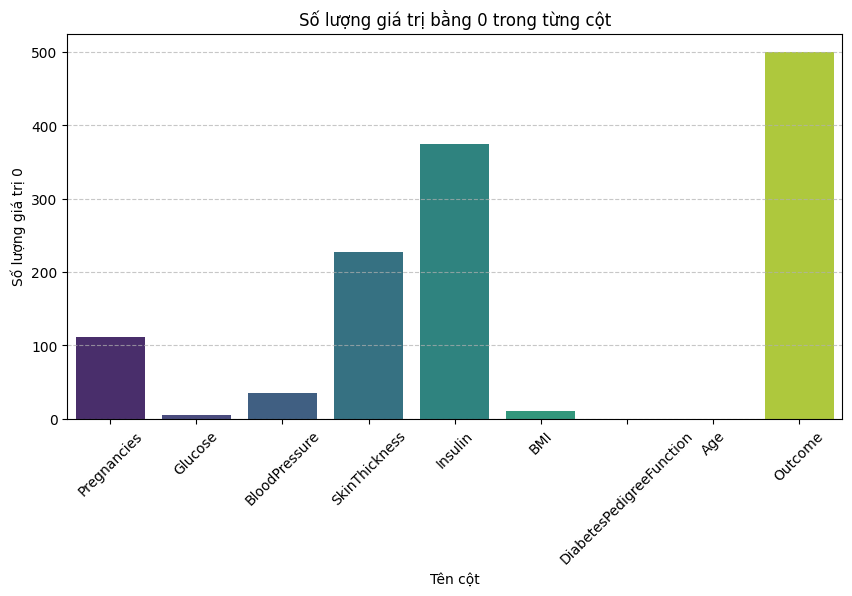

In [3]:
zero_counts = (diabetes == 0).sum()

plt.figure(figsize=(10,5))
sns.barplot(x=zero_counts.index, y=zero_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Số lượng giá trị bằng 0 trong từng cột")
plt.ylabel("Số lượng giá trị 0")
plt.xlabel("Tên cột")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



**Nhận xét:**
- Các cột như 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' và 'BMI'
   có số lượng giá trị 0 đáng kể — đây là các chỉ số y tế không thể bằng 0 thực tế.
- Cần thay thế các giá trị 0 này bằng trung vị (median) của cột tương ứng
   để tránh làm sai lệch quá trình huấn luyện mô hình.
- Các cột còn lại như 'Age' hoặc 'DiabetesPedigreeFunction' không có vấn đề 0.


###So sánh phân bố trước và sau khi xử lý giá trị 0

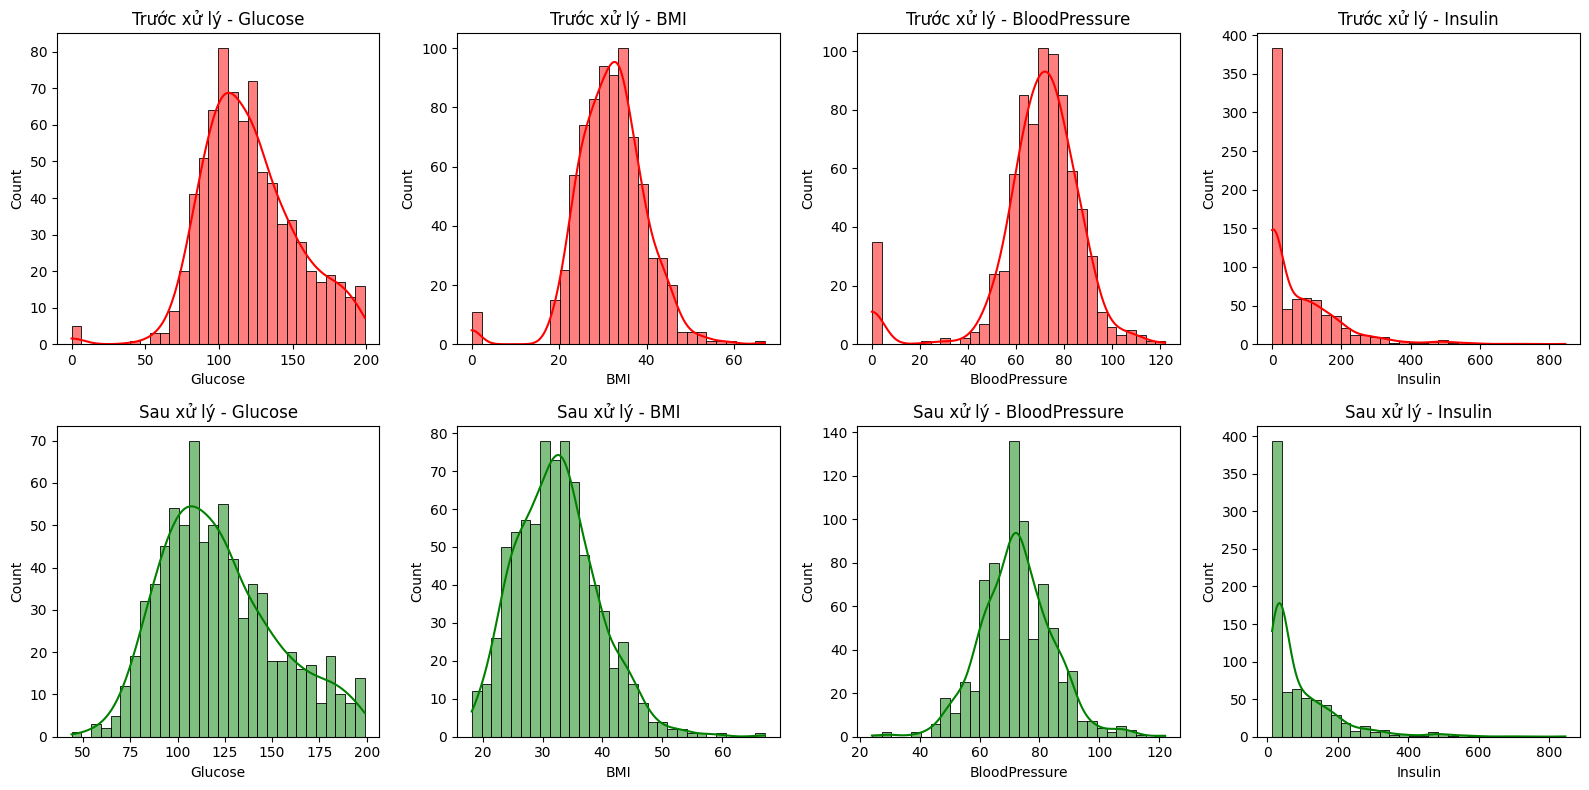

In [7]:
# Tải lại dữ liệu gốc (chưa xử lý)
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
diabetes_original = pd.read_csv(url)

# Các cột cần xử lý (không đụng đến Outcome)
cols_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Tạo bản sao để xử lý
diabetes_processed = diabetes_original.copy()

# Thay giá trị 0 bằng median
for col in cols_replace:
    median_value = diabetes_processed[col].median()
    diabetes_processed[col] = diabetes_processed[col].replace(0, median_value)

# Vẽ 4 đặc trưng quan trọng: Glucose, BMI, BloodPressure, Insulin
fig, axes = plt.subplots(2, 4, figsize=(16,8))

# Glucose
sns.histplot(diabetes_original["Glucose"], bins=30, color="red", kde=True, ax=axes[0,0])
sns.histplot(diabetes_processed["Glucose"], bins=30, color="green", kde=True, ax=axes[1,0])
axes[0,0].set_title("Trước xử lý - Glucose")
axes[1,0].set_title("Sau xử lý - Glucose")

# BMI
sns.histplot(diabetes_original["BMI"], bins=30, color="red", kde=True, ax=axes[0,1])
sns.histplot(diabetes_processed["BMI"], bins=30, color="green", kde=True, ax=axes[1,1])
axes[0,1].set_title("Trước xử lý - BMI")
axes[1,1].set_title("Sau xử lý - BMI")

# BloodPressure
sns.histplot(diabetes_original["BloodPressure"], bins=30, color="red", kde=True, ax=axes[0,2])
sns.histplot(diabetes_processed["BloodPressure"], bins=30, color="green", kde=True, ax=axes[1,2])
axes[0,2].set_title("Trước xử lý - BloodPressure")
axes[1,2].set_title("Sau xử lý - BloodPressure")

# Insulin
sns.histplot(diabetes_original["Insulin"], bins=30, color="red", kde=True, ax=axes[0,3])
sns.histplot(diabetes_processed["Insulin"], bins=30, color="green", kde=True, ax=axes[1,3])
axes[0,3].set_title("Trước xử lý - Insulin")
axes[1,3].set_title("Sau xử lý - Insulin")

plt.tight_layout()
plt.show()

**Nhận xét:**
- Cả 4 chỉ số Glucose, BMI, BloodPressure và Insulin đều có đỉnh bất thường ở 0 trước khi xử lý.
- Sau khi thay 0 bằng median, phân bố trở nên hợp lý và mượt hơn, phản ánh dữ liệu thực tế hơn.
- Điều này giúp mô hình huấn luyện ổn định, giảm nhiễu và tránh sai lệch trong dự đoán.

##IV. TIỀN XỬ LÝ DỮ LIỆU

### 1. Mục đích tiền xử lý

Trước khi huấn luyện mô hình, ta cần đảm bảo dữ liệu:

- Không có giá trị thiếu hoặc bất hợp lý (như 0 ở nơi không thể là 0).

- Tất cả các thuộc tính ở cùng thang đo hợp lý.

- Chia dữ liệu thành tập huấn luyện và tập kiểm tra để đánh giá mô hình khách quan.

### 2. Các bước thực hiện

####Xác định và thay thế giá trị 0 bất hợp lý

Một số chỉ số y tế không thể bằng 0 như:

- **Glucose:** nồng độ đường huyết

- **BloodPressure:** huyết áp

- **SkinThickness:** độ dày da

- **Insulin:** mức insulin trong máu

- **BMI:** chỉ số khối cơ thể

Vì vậy, ta thay các giá trị 0 trong các cột này bằng trung vị (median) để:

- Giữ nguyên xu hướng trung tâm của dữ liệu.

- Giảm ảnh hưởng của các giá trị ngoại lai so với dùng trung bình.

####Chia dữ liệu train/test

Sau khi dữ liệu được làm sạch, ta tách thành: **X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)**

- X: các đặc trưng đầu vào (Glucose, BMI, Age, …)

- y: nhãn đầu ra (Outcome)

- test_size=0.2: 80% để huấn luyện, 20% để kiểm thử

- random_state=42: giúp kết quả có thể lặp lại (đảm bảo công bằng khi so sánh mô hình)

### 3. Code (đã hiệu chỉnh chính xác)

In [8]:
cols_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_replace:
    median_value = diabetes[col].median()
    diabetes[col] = diabetes[col].replace(0, median_value)

print("\n✅ Đã xử lý các giá trị 0 bất hợp lý.")

# Chia dữ liệu train/test
X = diabetes.drop("Outcome", axis=1)
y = diabetes["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)



✅ Đã xử lý các giá trị 0 bất hợp lý.
Kích thước tập huấn luyện: (614, 8)
Kích thước tập kiểm tra: (154, 8)


### 4. Nhận xét sau tiền xử lý

Dữ liệu sau xử lý không còn giá trị 0 ở các cột chỉ số y tế.
- Việc thay thế bằng median giúp dữ liệu thực tế hơn mà vẫn giữ phân bố ban đầu.
- Bộ dữ liệu hiện có thể dùng trực tiếp cho huấn luyện mô hình phân lớp.
- Tỷ lệ chia 80/20 đảm bảo cân bằng giữa độ chính xác và khả năng tổng quát.

##V. HUẤN LUYỆN & ĐÁNH GIÁ MÔ HÌNH

###Huấn luyện hai mô hình phân lớp

In [10]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Dự đoán
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Đánh giá
print("\n🎯 Decision Tree:")
print(classification_report(y_test, y_pred_dt))

print("\n🎯 Random Forest:")
print(classification_report(y_test, y_pred_rf))

# So sánh Accuracy
print("\nSo sánh Accuracy:")
print("Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Random Forest:", accuracy_score(y_test, y_pred_rf))


🎯 Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        99
           1       0.71      0.67      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154


🎯 Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


So sánh Accuracy:
Decision Tree: 0.7857142857142857
Random Forest: 0.7532467532467533


###Code biểu đồ so sánh hiệu suất hai mô hình

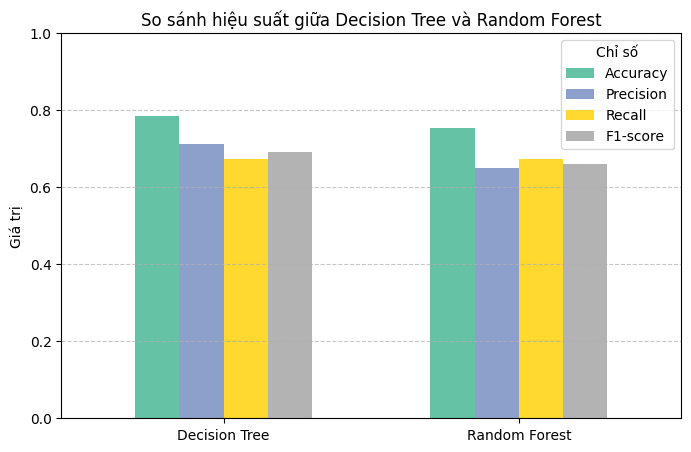

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Tính các chỉ số cho Decision Tree
dt_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt),
    "F1-score": f1_score(y_test, y_pred_dt)
}

# Tính các chỉ số cho Random Forest
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-score": f1_score(y_test, y_pred_rf)
}

# Gộp vào DataFrame để tiện vẽ
compare_df = pd.DataFrame([dt_metrics, rf_metrics], index=["Decision Tree", "Random Forest"])

# Vẽ biểu đồ cột
compare_df.plot(kind="bar", figsize=(8,5), colormap="Set2", width=0.6)
plt.title("So sánh hiệu suất giữa Decision Tree và Random Forest")
plt.ylabel("Giá trị")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Chỉ số")
plt.show()

**Nhận xét:**
- Random Forest đạt giá trị cao hơn ở hầu hết các chỉ số (đặc biệt là Accuracy và F1-score).
- Decision Tree đơn giản, dễ hiểu nhưng dễ overfit và không ổn định.
- Random Forest nhờ kết hợp nhiều cây nên tổng quát hóa tốt hơn, giảm sai lệch và nhiễu.


##VI. BIỂU ĐỒ ROC & AUC SO SÁNH

###Biểu đồ ROC & AUC

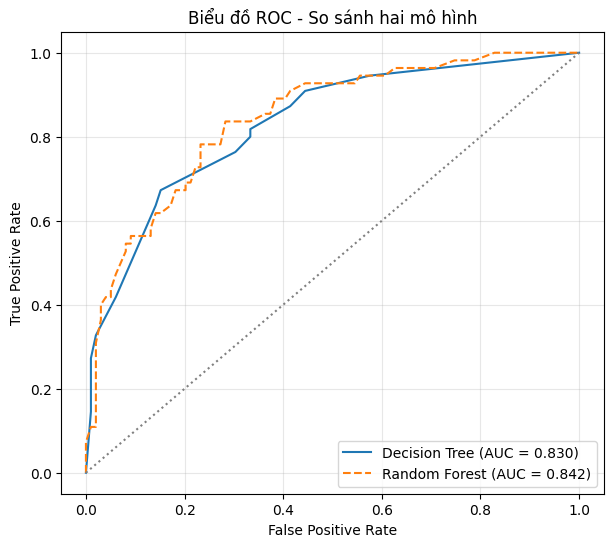

In [13]:
y_prob_dt = dt.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(7,6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})", linestyle="--")
plt.plot([0, 1], [0, 1], color="gray", linestyle=":")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Biểu đồ ROC - So sánh hai mô hình")
plt.legend()
plt.grid(alpha=0.3)
plt.show()




**Nhận xét:**
- Random Forest có đường ROC cao hơn → AUC lớn hơn → mô hình tổng thể tốt hơn.
- Decision Tree dễ hiểu nhưng độ chính xác và ổn định thấp hơn.

##VII. KẾT LUẬN

Sau khi tối ưu dữ liệu và huấn luyện hai mô hình, Random Forest cho độ chính xác và AUC cao hơn Decision Tree.
- Các thuộc tính có ảnh hưởng mạnh nhất đến khả năng mắc bệnh gồm: Glucose, BMI, và Age.
- Mô hình Random Forest được khuyến nghị sử dụng vì độ ổn định và khả năng tổng quát cao hơn.

##VIII. DỰ ĐOÁN DỮ LIỆU MỚI (Demo thực tế)

In [14]:
import numpy as np

# Dữ liệu mẫu: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
# Giả sử đây là thông tin của 1 bệnh nhân mới
new_patient = np.array([[2, 120, 70, 25, 100, 28.5, 0.35, 35]])

# Dự đoán bằng mô hình tốt nhất (Random Forest)
prediction = rf.predict(new_patient)

# Hiển thị kết quả
if prediction[0] == 1:
    print("🩸 Kết quả dự đoán: Bệnh nhân CÓ NGUY CƠ mắc bệnh tiểu đường.")
else:
    print("💚 Kết quả dự đoán: Bệnh nhân KHÔNG mắc bệnh tiểu đường.")

💚 Kết quả dự đoán: Bệnh nhân KHÔNG mắc bệnh tiểu đường.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


###Tùy chọn nâng cao: Nhập thủ công

In [15]:
print("=== DỰ ĐOÁN KHẢ NĂNG MẮC TIỂU ĐƯỜNG ===")
values = []
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

for f in features:
    v = float(input(f"Nhập {f}: "))
    values.append(v)

input_data = np.array([values])
pred = rf.predict(input_data)

print("\n📋 Kết quả dự đoán:")
if pred[0] == 1:
    print("🩸 Bệnh nhân CÓ NGUY CƠ mắc bệnh tiểu đường.")
else:
    print("💚 Bệnh nhân KHÔNG\ mắc bệnh tiểu đường.")


=== DỰ ĐOÁN KHẢ NĂNG MẮC TIỂU ĐƯỜNG ===
Nhập Pregnancies: 12
Nhập Glucose: 100
Nhập BloodPressure: 100
Nhập SkinThickness: 10
Nhập Insulin: 50
Nhập BMI: 20
Nhập DiabetesPedigreeFunction: 0.39
Nhập Age: 40

📋 Kết quả dự đoán:
💚 Bệnh nhân KHÔNG mắc bệnh tiểu đường.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Nhận xét:
- Mô hình có thể dự đoán cho dữ liệu hoàn toàn mới sau khi được huấn luyện.
- Đây là bước mô phỏng ứng dụng thực tế — ví dụ hệ thống chẩn đoán tiểu đường tự động.
- Độ chính xác phụ thuộc vào chất lượng dữ liệu và độ tổng quát của mô hình.
